# 初始化清洗数据库

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()
iris1=pd.DataFrame(iris.data,columns=iris.feature_names)
iris1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# 查看数据集的基本信息（可用于检测是否有空值/数值类型为多少）
iris1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
#查看数据集的统计描述
iris1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 实现k-means

In [46]:
class KMEAN:
    def __init__(max_iter=1000,tol=1e-4):
        self.max_iter=max_iter
        self.tol=tol
    
    def WCSS(X,zhixins,labels):                 #用来判断我们要取多少个质心 
        wcss=0
        for i in range(len(zhixins)):
            cluster_points=X[labels==i]
            distance=np.linalg.norm(cluster_points-zhixins[i],axis=1)
            wcss+=np.sum(distance**2)
        return wcss
    
    def kmeans(X, k, max_iters=300):
        zhixins=X[np.random.choice(X.shape[0], k, replace=False)]
        labels = np.zeros(X.shape[0])
    
        for _ in range(max_iters):
            for i in range(X.shape[0]):      #每个样本x[i]都要进入kmeans公式
                distances = np.linalg.norm(X[i] - zhixins, axis=1)
                labels[i] = np.argmin(distances)
            
            new_zhixins = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
            if np.all(zhixins == new_zhixins):
                break

            zhixins = new_zhixins
    
        return zhixins, labels
        
        

### 模型训练与评估

In [52]:
wcss = []
KM=KMEAN
for k in range(1, 11):  # 假设我们要测试簇数从1到10
    zhixins, labels = KM.kmeans(X, k)
    wcss.append(KM.WCSS(X, zhixins, labels))

### 画wcss

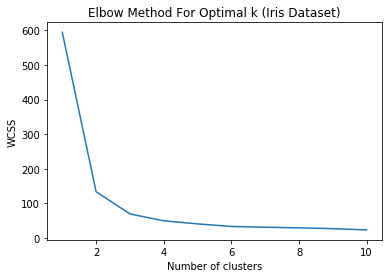

In [53]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k (Iris Dataset)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()             

### 画iris图

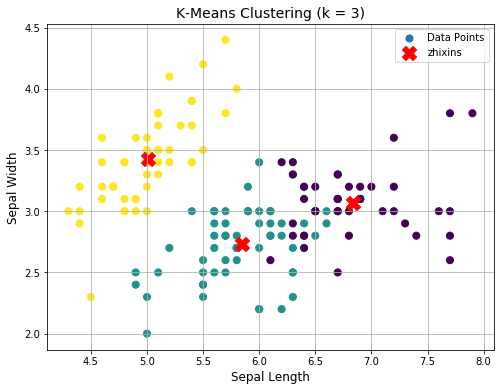

In [67]:
# 由上图可知拐点在 3 
k = 3
zhixins, labels = KM.kmeans(X, k)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50, label="Data Points")
plt.scatter(zhixins[:, 0], zhixins[:, 1], c='red', s=200, marker='X', label="zhixins")

plt.title("K-Means Clustering (k = 3)", fontsize=14)
plt.xlabel("Sepal Length", fontsize=12)
plt.ylabel("Sepal Width", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()